In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name, network_type='drive')
fig, ax = ox.plot_graph(graph)


# place_name = "Hackney, UK" #
# G = ox.graph_from_place(place_name, network_type='drive')
# nodes = ox.graph_to_gdfs(G, edges=False)
# area = ox.geocode_to_gdf(place_name)
# polygon = box(-0.104, 51.57, -0.08, 51.56) # temp
# area = area.clip(polygon) # temp
# for polygon in area['geometry']:
#     intersecting_nodes = nodes[nodes.intersects(polygon)].index
#     G_sub = G.subgraph(intersecting_nodes)
# ox.plot_graph(G_sub)

ValueError: Assigning CRS to a GeoDataFrame without a geometry column is not supported. Use GeoDataFrame.set_geometry to set the active geometry column.

In [21]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
print(edges.crs)
edges

epsg:4326


osmid  \
u           v          key                                                      
25216594    1372425714 0                                             23856784   
25238874    1372425713 0                                 [29977177, 30470347]   
25238944    25216594   0                                 [372440330, 8135861]   
            319896278  0            [25514547, 677423564, 30288797, 30288799]   
25291537    25291591   0    [30568275, 36729015, 316590744, 316590745, 316...   
...                                                                       ...   
1861896890  1861896883 0                                            175625233   
2037356632  56113314   0                                            119613505   
            1547012339 0                                            193218627   
3216400385  150983569  0                                             15240373   
12492942645 1378064355 0    [311975524, 314308165, 886664914, 122963284, 2...   

                            oneway   lanes             name        highway  \
u           v          key                                                   
25216594    1372425714 0      True       2   Mechelininkatu        primary   
25238874    1372425713 0      True       3   Mechelininkatu        primary   
25238944    25216594   0      True       2              NaN        primary   
            319896278  0      True  [3, 2]   Mechelininkatu        primary   
25291537    25291591   0      True     NaN    Fredrikinkatu       tertiary   
...                            ...     ...              ...            ...   
1861896890  1861896883 0      True       1              NaN       tertiary   
2037356632  56113314   0      True       1              NaN       tertiary   
            1547012339 0      True       1  Lapinlahdenkatu    residential   
3216400385  150983569  0     False     NaN   Kansakoulukuja    residential   
12492942645 1378064355 0     False     NaN       Lapinrinne  living_street   

                            maxspeed reversed   length  \
u           v          key                               
25216594    1372425714 0          40    False   40.885   
25238874    1372425713 0          40    False   16.400   
25238944    25216594   0          40    False   25.190   
            319896278  0    [40, 30]    False  242.476   
25291537    25291591   0          30    False  139.105   
...                              ...      ...      ...   
1861896890  1861896883 0          30    False    8.851   
2037356632  56113314   0          30    False    7.177   
            1547012339 0          30    False   19.463   
3216400385  150983569  0          30     True   38.739   
12492942645 1378064355 0         NaN     True   98.522   

                                                                     geometry  \
u           v          key                                                      
25216594    1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874    1372425713 0    LINESTRING (24.92103 60.16366, 24.92104 60.163...   
25238944    25216594   0    LINESTRING (24.92129 60.16463, 24.92127 60.164...   
            319896278  0    LINESTRING (24.92129 60.16463, 24.92136 60.164...   
25291537    25291591   0    LINESTRING (24.93702 60.16433, 24.93700 60.164...   
...                                                                       ...   
1861896890  1861896883 0    LINESTRING (24.92731 60.16566, 24.92725 60.165...   
2037356632  56113314   0    LINESTRING (24.93070 60.16643, 24.93071 60.166...   
            1547012339 0    LINESTRING (24.93070 60.16643, 24.93081 60.166...   
3216400385  150983569  0    LINESTRING (24.93400 60.16755, 24.93393 60.167...   
12492942645 1378064355 0    LINESTRING (24.92711 60.16701, 24.92712 60.167...   

                              junction width bridge access  
u           v          key                                  
25216594    1372425714 0           NaN   NaN    NaN    NaN  
25238874   

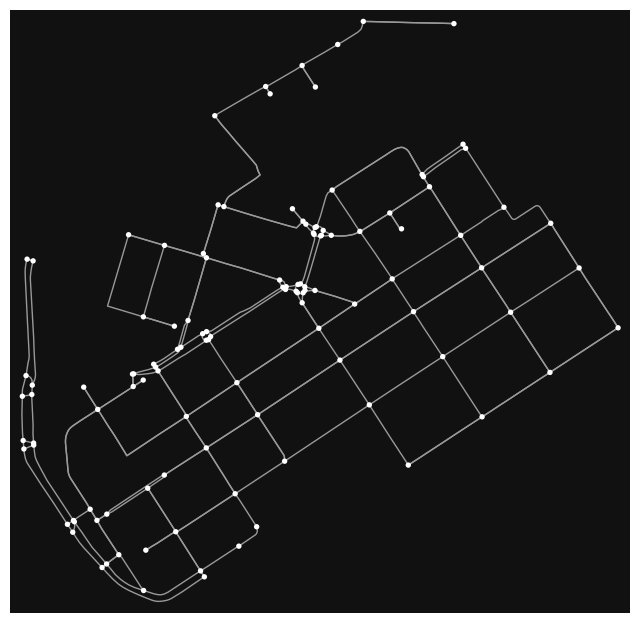

In [22]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [23]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
print("Coordinate system:", edges_proj.crs)

Coordinate system: EPSG:32635


In [24]:
nodes_proj

,y,x,street_count,lon,lat,highway,geometry
osmid,,,,,,,
25216594,6.671580e+06,384631.322372,4,24.921057,60.164794,NaN,POINT (384631.322 6671580.071)
1372425714,6.671540e+06,384624.178763,4,24.920951,60.164432,NaN,POINT (384624.179 6671539.986)
25238874,6.671454e+06,384625.803104,4,24.921029,60.163663,NaN,POINT (384625.803 6671454.179)
1372425713,6.671438e+06,384627.187049,4,24.921063,60.163516,NaN,POINT (384627.187 6671437.809)
25238944,6.671562e+06,384643.473274,3,24.921286,60.164631,NaN,POINT (384643.473 6671561.534)
...,...,...,...,...,...,...,...
1372461709,6.671853e+06,384830.142058,3,24.924482,60.167300,NaN,POINT (384830.142 6671853.149)
1378064355,6.671911e+06,385003.767878,3,24.927576,60.167870,crossing,POINT (385003.768 6671911.139)
12492942645,6.671817e+06,384975.201607,1,24.927115,60.167014,NaN,POINT (384975.202 6671816.663)


In [25]:
edges_proj

osmid  \
u           v          key                                                      
25216594    1372425714 0                                             23856784   
1372425714  25238874   0              [78537378, 8169098, 29081876, 78537375]   
            1011525940 0                                             29066052   
25238874    1372425713 0                                 [29977177, 30470347]   
1372425713  568147264  0                                             57839670   
...                                                                       ...   
12492942645 1378064355 0    [311975524, 314308165, 886664914, 122963284, 2...   
1861896879  724233128  0    [24568164, 231182442, 240775001, 240775002, 21...   
            1861896890 0                                            175625234   
1861896883  1372376963 0                                             15218821   
            337264937  0                                            175625230   

                            oneway   lanes             name        highway  \
u           v          key                                                   
25216594    1372425714 0      True       2   Mechelininkatu        primary   
1372425714  25238874   0      True  [3, 2]   Mechelininkatu        primary   
            1011525940 0      True       2              NaN        primary   
25238874    1372425713 0      True       3   Mechelininkatu        primary   
1372425713  568147264  0      True       1     Itämerenkatu       tertiary   
...                            ...     ...              ...            ...   
12492942645 1378064355 0     False     NaN       Lapinrinne  living_street   
1861896879  724233128  0      True       1  Ruoholahdenkatu       tertiary   
            1861896890 0      True       1              NaN       tertiary   
1861896883  1372376963 0      True       2  Ruoholahdenkatu       tertiary   
            337264937  0      True       1              NaN       tertiary   

                           maxspeed reversed   length  \
u           v          key                              
25216594    1372425714 0         40    False   40.885   
1372425714  25238874   0         40    False   85.741   
            1011525940 0         40    False   18.682   
25238874    1372425713 0         40    False   16.400   
1372425713  568147264  0         40    False   20.414   
...                             ...      ...      ...   
12492942645 1378064355 0        NaN     True   98.522   
1861896879  724233128  0         30    False  171.639   
            1861896890 0         30    False   14.006   
1861896883  1372376963 0         30    False   49.604   
            337264937  0         30    False   17.435   

                                                                     geometry  \
u           v          key                                                      
25216594    1372425714 0    LINESTRING (384631.322 6671580.071, 384624.750...   
1372425714  25238874   0    LINESTRING (384624.179 6671539.986, 384623.768...   
            1011525940 0    LINESTRING (384624.179 6671539.986, 384627.276...   
25238874    1372425713 0    LINESTRING (384625.803 6671454.179, 384626.317...   
1372425713  568147264  0    LINESTRING (384627.187 6671437.809, 384646.250...   
...                                                                       ...   
12492942645 1378064355 0    LINESTRING (384975.202 6671816.663, 384975.807...   
1861896879  724233128  0    LINESTRING (384989.181 6671655.567, 384994.381...   
            1861896890 0    LINESTRING (384989.181 6671655.567, 384989.272...   
1861896883  1372376963 0    LINESTRING (384973.800 6671661.288, 384965.531...   
            337264937  0    LINESTRING (384973.800 6671661.288, 384973.093...   

                              junction bridge width access  
u           v          key                                  
25216594    1372425714 0           NaN    NaN   NaN    NaN  
1372425714  25238874   0

In [26]:
stats = ox.basic_stats(graph_proj)
stats

{'n': 118,
 'm': 236,
 'k_avg': 4.0,
 'edge_length_total': 19530.592999999993,
 'edge_length_avg': 82.75674999999997,
 'streets_per_node_avg': 3.2203389830508473,
 'streets_per_node_counts': {0: 0, 1: 9, 2: 0, 3: 65, 4: 44},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.07627118644067797,
  2: 0.0,
  3: 0.5508474576271186,
  4: 0.3728813559322034},
 'intersection_count': 109,
 'street_length_total': 13366.24,
 'street_segment_count': 173,
 'street_length_avg': 77.2615028901734,
 'circuity_avg': 1.0294995660150579,
 'self_loop_proportion': 0.0}

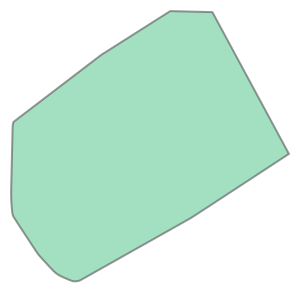

In [27]:
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [28]:
area = convex_hull.area
stats = ox.basic_stats(graph_proj, area=area)
pd.Series(stats)

n                                                                             118
m                                                                             236
k_avg                                                                         4.0
edge_length_total                                                       19530.593
edge_length_avg                                                          82.75675
streets_per_node_avg                                                     3.220339
streets_per_node_counts                          {0: 0, 1: 9, 2: 0, 3: 65, 4: 44}
streets_per_node_proportions    {0: 0.0, 1: 0.07627118644067797, 2: 0.0, 3: 0....
intersection_count                                                            109
street_length_total                                                      13366.24
street_segment_count                                                          173
street_length_avg                                                       77.261503
circuity_avg    

In [29]:
centroid = convex_hull.centroid
print(centroid)

POINT (385150.1697591227 6671710.930233404)


In [30]:
maxx = nodes_proj['x'].max() # most eastern coordinate
print(maxx)

385779.2070153267


In [31]:
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(target)

POINT (385779.2070153267 6671672.709376794)


In [32]:
# Get origin x and y coordinates
orig_xy = (centroid.y, centroid.x)

# Get target x and y coordinates
target_xy = (target.y, target.x)

In [33]:
print(centroid)
print(target)

POINT (385150.1697591227 6671710.930233404)
POINT (385779.2070153267 6671672.709376794)


In [35]:
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node

AttributeError: module 'osmnx' has no attribute 'get_nearest_node'

In [17]:
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node

25291564